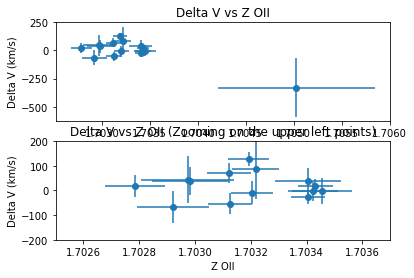

In [38]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
ciii =  ascii.read('/home/ahmed/astro/spectra/redshift.dat')
oii = ascii.read('/home/ahmed/astro/spectra/redshiftOII.dat')

zc = ciii[4][:]
zc_er = ciii[5][:]

zo = oii[4][:]
zo_er = oii[5][:]

#print(len(zc))
#print(len(zo))
qc = np.array([12,13,14])
qo = np.array([15])
#print(q)
zc = np.delete(zc,qc); zc_er = np.delete(zc_er,qc)
zo = np.delete(zo,qo); zo_er = np.delete(zo_er,qo)
dz = zc - zo
dz_er = np.sqrt((zc_er**2)+ (zo_er**2))

def d_vel(dz):
    c = 299792.458
    beta = ((dz + 1.)**2. - 1.)/((dz + 1.)**2. + 1.)
    dv = beta * c
    return dv

dv = d_vel(dz)
dv_er = d_vel(dz_er)
fig, ax = plt.subplots(2)
ax[0].errorbar(zo, dv, yerr=dv_er,xerr=zo_er,fmt='o')
ax[0].set_title('Delta V vs Z OII')
ax[0].set_xlabel('Z OII')
ax[0].set_ylabel('Delta V (km/s)')

ax[1].errorbar(zo, dv, yerr=dv_er,xerr=zo_er,fmt='o')
ax[1].set_title('Delta V vs Z OII')
ax[1].set_xlabel('Z OII')
ax[1].set_ylabel('Delta V (km/s)')
ax[1].set_xlim([1.7025,1.7037])
ax[1].set_ylim([-200,200])
ax[1].set_title('Delta V vs Z OII (Zooming on the upper left points)')
ax[1].set_xlabel('Z OII')
ax[1].set_ylabel('Delta V (km/s)')
manager = plt.get_current_fig_manager()
#manager.frame.Maximize(True)
print(manager)
fig.savefig('/home/ahmed/astro/figures/emission_maps/dvVsredshift.pdf',bbox_inches='tight')
plt.show()